#### Importing Testing & Training Datasets

The datasets are the following (<mark>both are saved under the directory Saved Datasets</mark>):
- Training_Binary.pkl
- Testing_Binary.pkl

In [1]:
import pickle as pkl
import pandas as pd
import os

FILENAME_DATASET = 'Dataset_Binary.pkl'
FILENAME_TESTING = 'Testing_Binary.pkl'
FILENAME_TRAINING = 'Training_Binary.pkl'
DIRECTORY = 'Saved Datasets'

dataset = os.path.join(DIRECTORY, FILENAME_DATASET)
dataset_training = os.path.join(DIRECTORY, FILENAME_TRAINING)
dataset_testing = os.path.join(DIRECTORY, FILENAME_TESTING)

# Loading Final Dataset
df = pd.read_csv('../../Datasets/BLE/BLE_Malicious_Dataset_Final.csv')
x_columns = df.columns.drop(['is_malicious'])
print(f'[DONE] Loading final dataset')

# Loading Dataset 
with open(dataset, 'rb') as f:
    x, y = pkl.load(f)
print(f'[DONE] Loading dataset')

# Loading Train Fraction 
with open(dataset_training, 'rb') as f:
    x_train, y_train = pkl.load(f)
print(f'[DONE] Loading train fraction')

# Loading Test Fraction 
with open(dataset_testing, 'rb') as f:
    x_test, y_test = pkl.load(f)
print(f'[DONE] Loading test fraction')

[DONE] Loading final dataset
[DONE] Loading dataset
[DONE] Loading train fraction
[DONE] Loading test fraction


#### Defining Metrics & Plots

The following sections defines the classification metrics used for the traditional machine learning algorithms used in this notebook. The metrics are:

- Accuracy
- Recall
- Precision
- F1-Score

It also defines the Extra Tree Classifier and the Confusion Matrix used to classify the algorithms used.

In [2]:
# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [3]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion = 'entropy', max_features = 2)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.figure(figsize = (10, 6))
    plt.bar(x_columns, feature_importance_normalized, align = 'center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation = 90)
    plt.show()

In [4]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test

    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels = ['Benign', 'Malicious'])

    fig, ax = plt.subplots(figsize = (6, 6))

    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation = 0, labelpad = 10)
    ax.set_ylabel('True labels', rotation = 90, labelpad = 10)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Attack'], rotation = 0, ha = 'center', va = 'center')
    ax.set_yticklabels(['Normal', 'Attack'], rotation = 90, ha = 'center', va = 'center')

    ax.tick_params(axis = 'x', pad = 10)
    ax.tick_params(axis = 'y', pad = 10)

    cmd.plot(ax = ax, cmap = plt.cm.Blues)

#### Tradicional Machine Learning Algorithms

The steps above will showcase the application of the algorithms <mark>Random Forest</mark>, <mark>Decision Tree</mark>, <mark>Logistic Regression</mark>, and <mark>KNeighbors</mark> in the present dataset alongside with the results of the classification metrics defined in the block of code above.

[METRICS] Random Forest Classifier
Accuracy: 0.9999383451847589
Recall: 0.9999383451847589
Precision: 0.9999383529038328
F1-Score: 0.9999383452423489

[CMATRIX] Random Forest Confusion Matrix


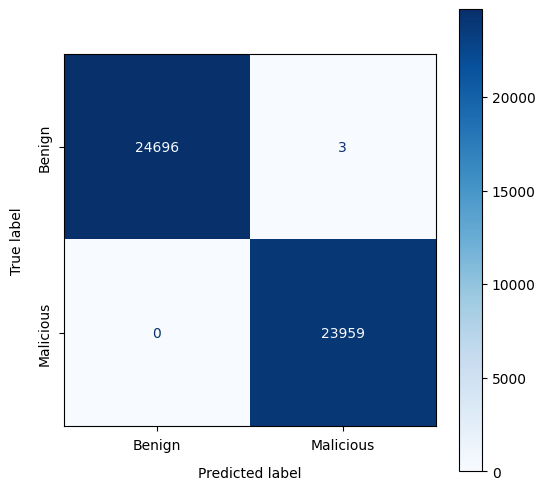

In [5]:
# Algorithm: RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators = 100, random_state = 100)
forest.fit(x_train, y_train)
forest_prediction = forest.predict(x_test)

print(f'[METRICS] Random Forest Classifier')
compute_metrics(y_test, forest_prediction)

print(f'\n[CMATRIX] Random Forest Confusion Matrix')
conf_matrix(y_test, forest_prediction)

[METRICS] Decision Tree Classifier
Accuracy: 0.9999383451847589
Recall: 0.9999383451847589
Precision: 0.9999383529038328
F1-Score: 0.9999383452423489

[CMATRIX] Decision Tree Confusion Matrix


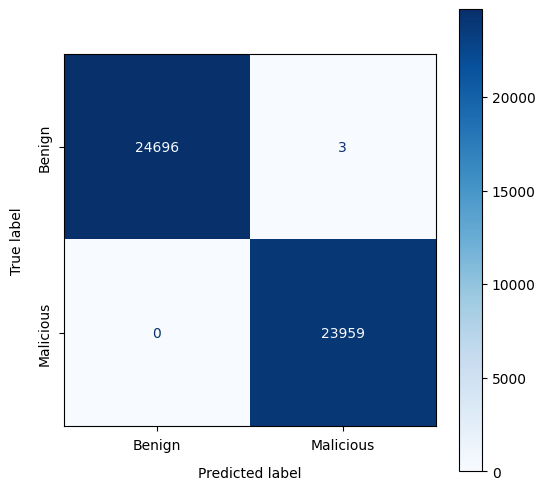

In [6]:
# Algorithm: DECISION TREE
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 100)
tree.fit(x_train, y_train)
tree_prediction = tree.predict(x_test)

print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_test, tree_prediction)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_test, tree_prediction)

[METRICS] Kneighbors Classifier
Accuracy: 0.9993217970323482
Recall: 0.9993217970323482
Precision: 0.9993226210258108
F1-Score: 0.9993218033296039

[CMATRIX] Kneighbors Confusion Matrix


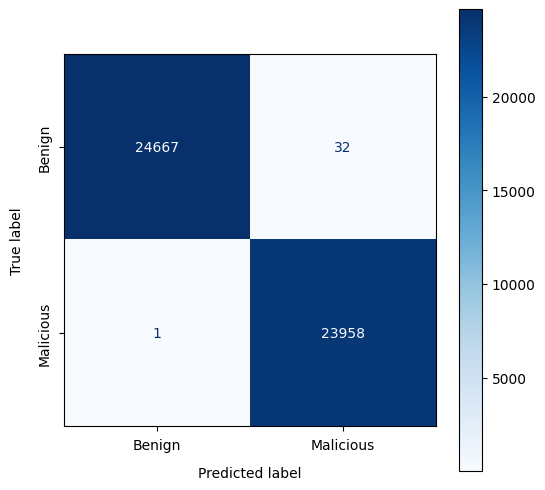

In [7]:
# Algorithm: KNEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform')
neighbors.fit(x_train, y_train)
neighbors_prediction = neighbors.predict(x_test)

print(f'[METRICS] Kneighbors Classifier')
compute_metrics(y_test, neighbors_prediction)

print(f'\n[CMATRIX] Kneighbors Confusion Matrix')
conf_matrix(y_test, neighbors_prediction)

[METRICS] Logistic Regression Classifier
Accuracy: 0.9931152122980805
Recall: 0.9931152122980805
Precision: 0.9932013631883105
F1-Score: 0.993115602857698

[CMATRIX] Logistic Regression Confusion Matrix


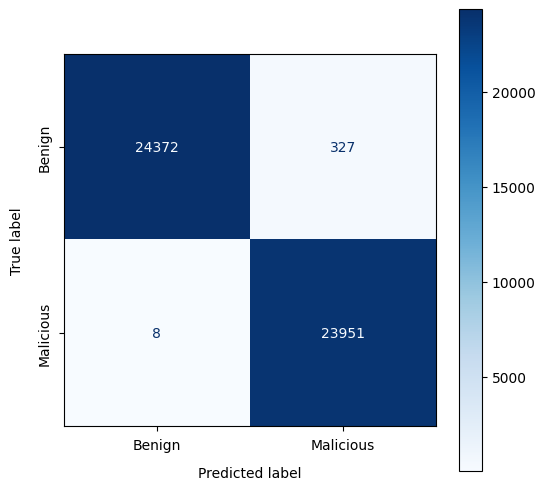

In [8]:
# Algorithm: LOGISTIC REGRESSION
import numpy as np
from sklearn.linear_model import LogisticRegression

y_train_1d = np.argmax(y_train, axis = 1)
y_test_1d = np.argmax(y_test, axis = 1)

logistic = LogisticRegression(random_state = 100, solver = 'lbfgs', max_iter = 5000)
logistic.fit(x_train, y_train_1d)
logistic_prediction = logistic.predict(x_test)

print(f'[METRICS] Logistic Regression Classifier')
compute_metrics(y_test_1d, logistic_prediction)

print(f'\n[CMATRIX] Logistic Regression Confusion Matrix')
conf_matrix(y_test_1d, logistic_prediction, 1)

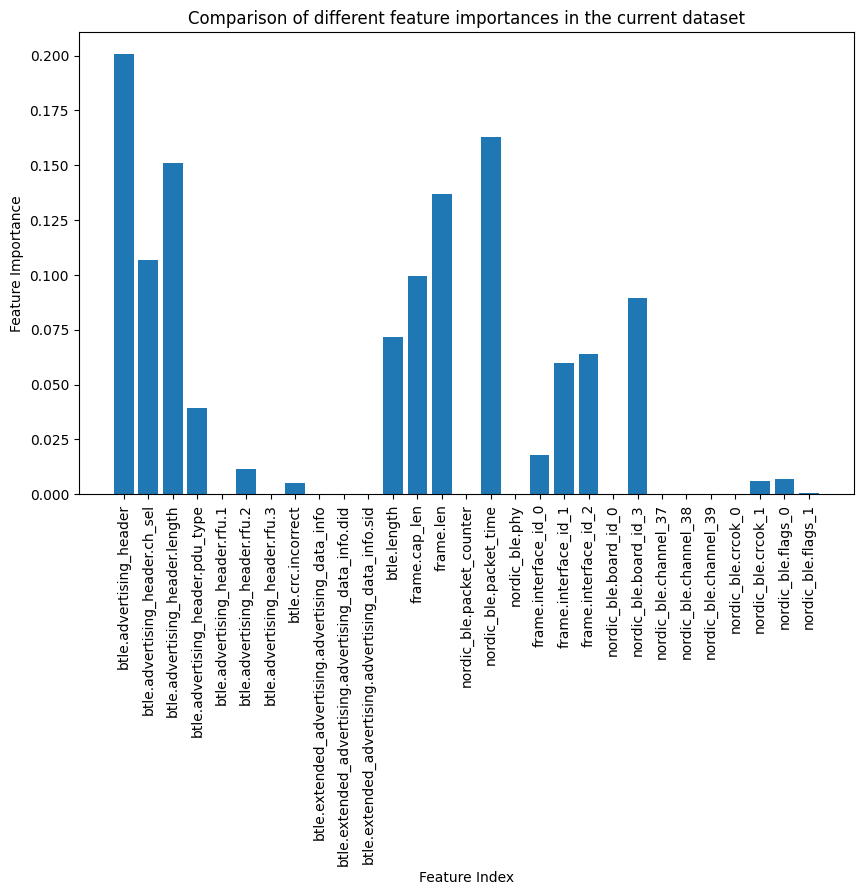

In [9]:
extra_tree_classifier(x_train, y_train, x_columns)